На использованном в работе наборе данных примените другие вариации модели наивного Байеса - Мультономиальный, Бернулли, категориальные и комплементарный. Для каждой модели сделайте вывод о ее применимости.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB, ComplementNB
from sklearn.metrics import accuracy_score


data = load_breast_cancer()
X = data.data
y = data.target


models = {
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "CategoricalNB": CategoricalNB(),
    "ComplementNB": ComplementNB()
}

for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f"{name}: Accuracy = {accuracy}")


MultinomialNB: Accuracy = 0.8963093145869947
BernoulliNB: Accuracy = 0.6274165202108963
CategoricalNB: Accuracy = 0.9595782073813708
ComplementNB: Accuracy = 0.8945518453427065


Загрузите набор данных о выживших на титанике, прилагающийся к этой работе. Повторите на нем моделирование из методических указаний. Попробуйте разные варианты байесовского классификатора в зависимости от форм расрпеделния эмпирических данных.

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer


titanic_data = sns.load_dataset('titanic')


X = pd.get_dummies(titanic_data.drop(['survived', 'alive'], axis=1))
y = titanic_data['survived']


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB()
}

for name, model in models.items():
    model.fit(X_imputed, y)
    y_pred = model.predict(X_imputed)
    accuracy = accuracy_score(y, y_pred)
    print(f"{name} Accuracy: {accuracy}")




GaussianNB Accuracy: 0.7878787878787878
MultinomialNB Accuracy: 0.7003367003367004
BernoulliNB Accuracy: 0.7991021324354658


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Загрузка данных
titanic_data = pd.read_csv("train_and_test2.csv")


titanic_data = titanic_data.drop(columns=['zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'zero.15', 'zero.16', 'zero.17', 'zero.18'])


X = titanic_data.drop(columns=['Passengerid', '2urvived'])
y = titanic_data['2urvived']


imputer = SimpleImputer(strategy='most_frequent')
X = imputer.fit_transform(X)





model = GaussianNB()
model.fit(X, y)


y_pred = model.predict(X)


accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.7570664629488159


In [ ]:
titanic_data


,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,3,2.0,0
1305,1306,39.0,108.9000,1,0,0,1,0.0,0
1306,1307,38.5,7.2500,0,0,0,3,2.0,0
1307,1308,28.0,8.0500,0,0,0,3,2.0,0


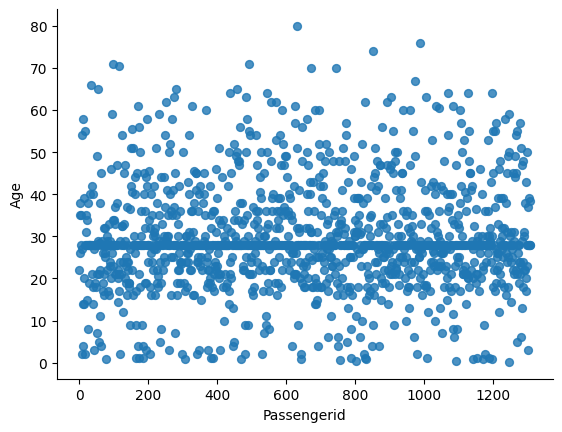

In [ ]:
# @title Passengerid vs Age

from matplotlib import pyplot as plt
titanic_data.plot(kind='scatter', x='Passengerid', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
titanic_data = pd.read_csv("train_and_test2.csv")


titanic_data.head()


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
